# Development: De-congestion for PIBT upon tunnel entrance

In [1]:
import sys
sys.path.append('../')

sys.path.append('../../')
import numpy as np
import cvxpy as cp
from matplotlib import pyplot as plt
from panav.environment.env import MultiTunnelEnv,DefaultEmtpyEnv
from panav.hybrid import HybridGraph

from panav.viz import draw_env

import shapely

from panav.ORCA import Ordered_Agent

%load_ext autoreload
%autoreload 2

%load_ext snakeviz

In [60]:

bloating_r = 0.5
vmax = 1.0


results = []

env_name = "MultiTunnel"

# Current algorithm runs quickly under this config
N = 80
limits = [(-15,15),(-40,40)] 
n_tunnel = 16

# Current algorithm runs slowly under this config
# N = 20
# n_tunnel = 4


env = MultiTunnelEnv(n_tunnel = n_tunnel, tunnel_width = bloating_r*2.5,limits=limits, N_agent = N)

HG = HybridGraph(env,bloating_r)


KeyboardInterrupt: 

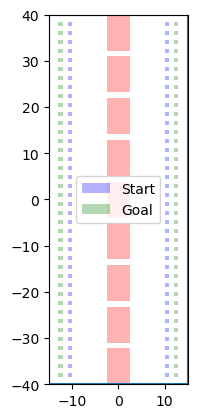

In [ ]:
draw_env(env)

In [ ]:
to_remove = []
for e in HG.edges:
    if HG.edges[e]['type']=='soft':
        # HG.edges[e]['weight'] = 0
        # pass
        u,v = e
        if HG.nodes[u]['type']== HG.nodes[v]['type']=='tunnel' and \
                                HG.nodes[u]['open_space_id'] == HG.nodes[v]['open_space_id']:
           to_remove.append(e) # Remove the soft edges connecting two tunnel endpoints for this particular environment
for e in to_remove:
    HG.remove_edge(*e)

for e in HG.edges:
    if HG.edges[e]['type'] == 'hard':
        HG.edges[e]['occupants'] = set()
        w,v = e
        HG.nodes[v]['occupant'] = HG.nodes[w]['occupant'] = None
        
from panav.PIBT import PIBT_plan
plans = PIBT_plan(HG,vmax,bloating_r,TIMEOUT=60,consider_entry=True)

################# Time step 0 ################
################# Time step 1 ################
################# Time step 2 ################
################# Time step 3 ################
################# Time step 4 ################
################# Time step 5 ################
################# Time step 6 ################
################# Time step 7 ################
################# Time step 8 ################
################# Time step 9 ################
################# Time step 10 ################
################# Time step 11 ################
agent 56 entering tunnel 6 7
agent 62 entering tunnel 8 9
agent 66 entering tunnel 10 11
################# Time step 12 ################
agent 18 waiting at tunnel 7 6
################# Time step 13 ################
agent 18 waiting at tunnel 7 6
agent 24 waiting at tunnel 11 10
agent 38 entering tunnel 15 14
agent 78 waiting at tunnel 14 15
################# Time step 14 ################
agent 18 waiting at tunnel 7 6
agent 19 wa

/home/naliseas-workstation/miniconda2/envs/MAMP/lib/python3.10/site-packages/cvxpy/problems/problem.py:1413: UserWarning: 
    The problem is either infeasible or unbounded, but the solver
    cannot tell which. Disable any solver-specific presolve methods
    and re-solve to determine the precise problem status.

    For GUROBI and CPLEX you can automatically perform this re-solve
    with the keyword argument prob.solve(reoptimize=True, ...).
    
  warnings.warn(INF_OR_UNB_MESSAGE)


################# Time step 26 ################
agent 14 waiting at tunnel 7 6
agent 15 waiting at tunnel 9 8
agent 18 waiting at tunnel 7 6
agent 19 waiting at tunnel 9 8
agent 24 waiting at tunnel 11 10
agent 46 waiting at tunnel 0 1
agent 48 waiting at tunnel 4 5
agent 52 waiting at tunnel 2 3
agent 68 waiting at tunnel 12 13
agent 70 waiting at tunnel 14 15
agent 75 waiting at tunnel 12 13
agent 78 waiting at tunnel 14 15
Potential deadlock
################# Time step 27 ################
agent 14 waiting at tunnel 7 6
agent 15 waiting at tunnel 9 8
agent 18 waiting at tunnel 7 6
agent 19 waiting at tunnel 9 8
agent 24 waiting at tunnel 11 10
agent 46 waiting at tunnel 0 1
agent 48 waiting at tunnel 4 5
agent 52 waiting at tunnel 2 3
agent 68 waiting at tunnel 12 13
agent 70 waiting at tunnel 14 15
agent 75 waiting at tunnel 12 13
agent 78 waiting at tunnel 14 15
Potential deadlock
################# Time step 28 ################
agent 14 waiting at tunnel 7 6
agent 15 waiting at tun

KeyboardInterrupt: 

In [56]:
from panav.viz import animation
from IPython.display import HTML, display

exec_tau = 1.0

dt = exec_tau * 0.25
agents = range(len(plans))
pos_to_ani = [np.array(plans[a][1]) for a in agents]
anim = animation(env, pos_to_ani, bloating_r, dt = dt)
display(HTML(anim.to_jshtml()))
plt.close() 